In [1]:
import pandas as pd
from pylab import *
%matplotlib inline

In [2]:
cali = pd.read_csv("../data/calibrations.csv")
cali["TPAmplitude_e"]= cali.TPAmplitude_mV*1e-3/3*(60*1e-15)/(1.6*1e-19)

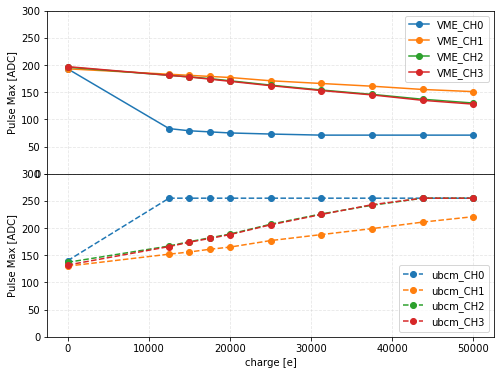

In [3]:
f, (ax1, ax2) = plt.subplots(2,1, sharey=True, facecolor='w',figsize=(8,6))
plt.subplots_adjust(hspace=0)

for i in range(4):
    ax1.plot(cali.TPAmplitude_e, cali["VME_CH{}".format(i)], "o-",color="C{}".format(i))
    ax2.plot(cali.TPAmplitude_e, cali["ubcm_CH{}".format(i)], "o--",color="C{}".format(i))    
    
ax1.set_ylim(0,300)
#ax1.set_xlim(-10,500)
ax1.legend(loc="upper right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel("Pulse Max [ADC]")
ax1.set_xticklabels([])

ax2.set_ylim(0,300)
#ax2.set_xlim(-10,500)
ax2.legend(loc="lower right")
ax2.grid(linestyle='--',alpha=0.3)
ax2.set_ylabel("Pulse Max [ADC]")
ax2.set_xlabel("charge [e]")
plt.savefig('../plots/calibration.png',dpi=300)

In [11]:
const = {}
for backend in ["VME","ubcm"]:
    for ich in range(1,4):
        key = "{}_CH{}".format(backend,ich)
        fit = np.polyfit(cali[key][1:-1],cali.TPAmplitude_e[1:-1],deg=1)
        const[key] = fit
        
df = pd.DataFrame(const)
df.to_pickle("../data/calibration_linearFit.pkl")